## TASK 3: SPAM SMS DETECTION

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string

In [4]:
sms = pd.read_csv(r"C:\Users\HP\Downloads\spam sms\spam.csv" , encoding='latin-1')
sms


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
sms = sms[['v1', 'v2']]
sms.columns = ['label', 'text'] 
sms.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
sms.dtypes

label    object
text     object
dtype: object

In [8]:
sms.isnull().sum()

label    0
text     0
dtype: int64

In [10]:
import warnings 
warnings.filterwarnings('ignore')

In [11]:
sms['label_num'] = sms['label'].map({'ham': 0, 'spam': 1})
def clean_text(text):
    text = text.lower() 
    text = re.sub(r'\d+', '', text)  
    text = text.translate(str.maketrans('', '', string.punctuation)) 
    text = text.strip() 
    return text
sms['clean_text'] = sms['text'].apply(clean_text)
sms.head()

,label,text,label_num,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",0,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry in a wkly comp to win fa cup final...
3,ham,U dun say so early hor... U c already then say...,0,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah i dont think he goes to usf he lives aroun...


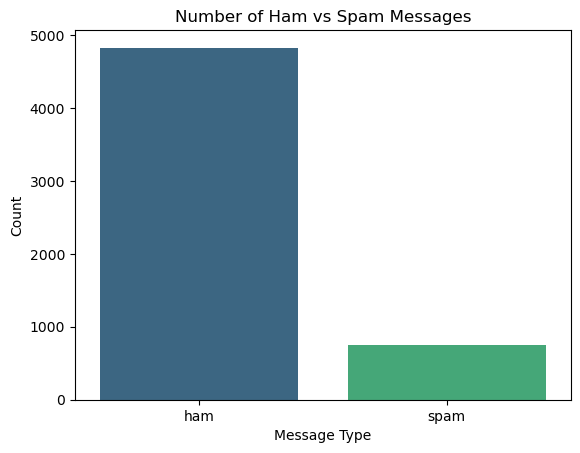

In [12]:
sns.countplot(x='label', data=sms, palette='viridis')
plt.title('Number of Ham vs Spam Messages')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()


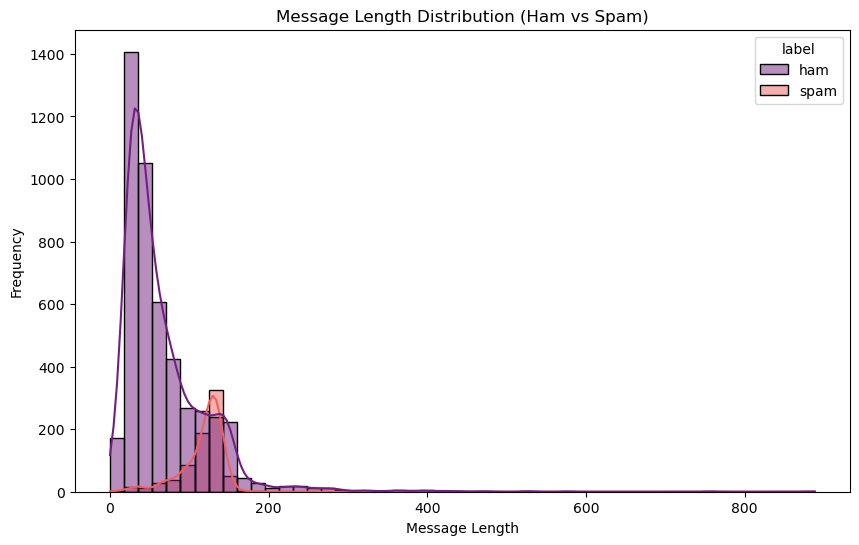

In [13]:
sms['text_length'] = sms['clean_text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=sms, x='text_length', hue='label', bins=50, kde=True, palette='magma')
plt.title('Message Length Distribution (Ham vs Spam)')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(sms['clean_text'])
y = sms['label_num']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [22]:
from sklearn.metrics import  accuracy_score , classification_report, confusion_matrix

In [23]:
y_pred_nb = nb.predict(X_test)
print("📊 Naive Bayes Classifier Results\n")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

📊 Naive Bayes Classifier Results

Accuracy: 0.968609865470852

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Confusion Matrix:
 [[965   0]
 [ 35 115]]


In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000) 
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [27]:
y_pred_lr = lr.predict(X_test)
print("📊 Logistic Regression Classifier Results\n")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


📊 Logistic Regression Classifier Results

Accuracy: 0.9443946188340807

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       965
           1       0.97      0.61      0.75       150

    accuracy                           0.94      1115
   macro avg       0.96      0.80      0.86      1115
weighted avg       0.95      0.94      0.94      1115

Confusion Matrix:
 [[962   3]
 [ 59  91]]


In [28]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(X_train, y_train)

LinearSVC()

In [30]:
y_pred_svm = svm.predict(X_test)
print("📊 Support Vector Machine (SVM) Classifier Results\n")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

📊 Support Vector Machine (SVM) Classifier Results

Accuracy: 0.9739910313901345

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.97      0.83      0.90       150

    accuracy                           0.97      1115
   macro avg       0.97      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Confusion Matrix:
 [[961   4]
 [ 25 125]]


In [31]:
model_names = ['Naive Bayes', 'Logistic Regression', 'SVM']
accuracies = [
    accuracy_score(y_test, y_pred_nb),
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_svm)]

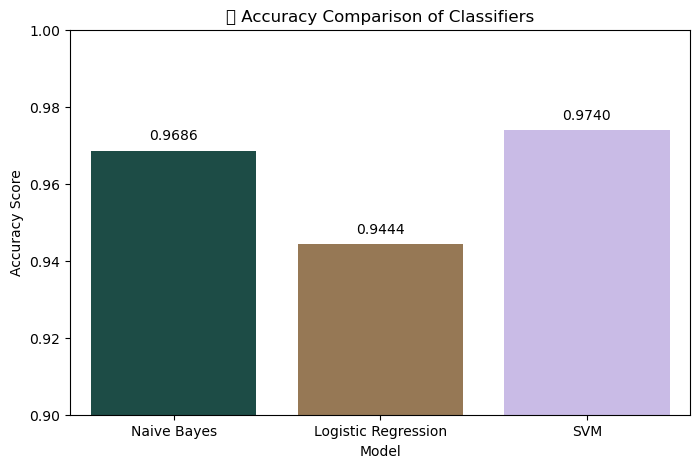

In [32]:
plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies, palette='cubehelix')
plt.ylim(0.9, 1.0)  # zoom into high accuracy range
plt.title('📊 Accuracy Comparison of Classifiers')
plt.ylabel('Accuracy Score')
plt.xlabel('Model')
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.002, f"{acc:.4f}", ha='center', va='bottom')
plt.show()